In [1]:
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import cv2


%run "C:\Users\neoSTORM6\Documents\ImageAnalysis3\required_files\Startup_py3.py"
sys.path.append(r"C:\Users\neoSTORM6\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

354524


## 1. Make subfolders for experiments

In [13]:
# define the experiment folder

data_folder= r'D:\Shiwei\20250216-hM1_CTP14_from_Cx28_sample5'

In [12]:
# generate subfolders as specified
sub_fds = ['Alignment', 'Tests', 'Mosaics','Experiments']

for _fd in sub_fds:
    if os.path.exists(os.path.join(data_folder, _fd)):
        print(f'Subfolder {_fd} already exists , Skip.')
    else:
        os.mkdir(os.path.join(data_folder, _fd))
        print(f'Creating subfolder {_fd}.')

Creating subfolder Alignment.
Creating subfolder Tests.
Creating subfolder Mosaics.
Creating subfolder Experiments.


## 2. Rotate images in Alignment subfolder for sample re-alignment

In [4]:
# define function for rotating and saving images for sample re-alignment

def generate_dapi_ims_for_align (data_folder, 
                                 align_fd = 'Alignment', 
                                 im_type = 'dax', 
                                 #num_step = 50,
                                 num_ch = 4,                          # number of channel for the images
                                 dapi_ch_index = 3,                  # the channel index for dapi for the images
                                 z_max=True, 
                                 rotate_ims=True, rotate_method = cv2.ROTATE_90_COUNTERCLOCKWISE,
                                 save_ims=True,
                                ):
    
    from ImageAnalysis3.visual_tools import DaxReader
    import glob, os
    import cv2
    
    if os.path.exists(data_folder):
        align_folder = os.path.join(data_folder,align_fd)
        align_ims = [DaxReader(_f).loadMap() for _f in glob.glob(align_folder+os.sep+'*') if im_type in _f]
        # get all dapi channel
        dapi_ims = []
        for _ims in align_ims:
            dapi_im = [_ims[_i] for _i in range(dapi_ch_index,len(_ims),num_ch)]
            dapi_ims.append(dapi_im)
        # z-max and rotate accordingly    
        if z_max:
            dapi_ims = [np.max(dapi_im, axis=0) for dapi_im in dapi_ims]
            if rotate_ims:
                dapi_ims =  [cv2.rotate(dapi_im, rotate_method) for dapi_im in dapi_ims]
        # save rotated z-max as TIFs in the same subfolder
        if save_ims:
            print('Generating rotated DAPI images for 60x alignment.')
            save_filenames = [_f.replace('dax','tif') for _f in glob.glob(align_folder+os.sep+'*') if im_type in _f]
            for dapi_im, save_filename in zip(dapi_ims,save_filenames):
                cv2.imwrite(save_filename, dapi_im)

        return dapi_ims

In [15]:
# define the experiment folder (if necessary) and run function

# data_folder= r'S:\20220208-P_brain_M1_nonclear'
dapi_data_folder = r'D:\Shiwei\20250216-hM1_CTP14_from_Cx28_sample5'
dapi_ims = generate_dapi_ims_for_align(dapi_data_folder,
                                       num_ch = 4,
                                       dapi_ch_index = 3,
                                       rotate_method = cv2.ROTATE_90_COUNTERCLOCKWISE,save_ims=True)

Generating rotated DAPI images for 60x alignment.


<IPython.core.display.Javascript object>


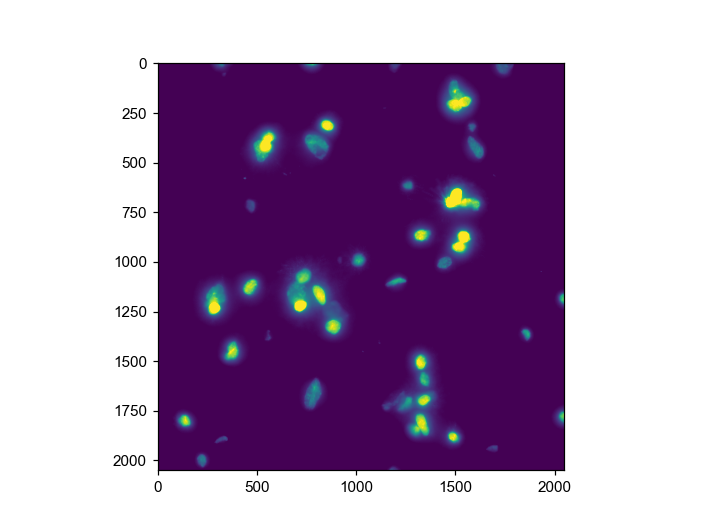

In [6]:
# show the rotated images if desired
%matplotlib notebook
plt.imshow(dapi_ims[1], vmin=1000, vmax=10000)